# loading the data 

In [4]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,1257,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,2022-08-07 17:00:42.959427072,155.399694,157.123354,153.797403,155.546267,8.892825e+07
min,2020-02-10 00:00:00,55.411085,55.513122,51.652713,54.509754,2.323470e+07
25%,2021-05-10 00:00:00,129.426482,130.797476,127.762806,129.125732,5.463050e+07
50%,2022-08-08 00:00:00,152.787173,155.068197,151.248093,153.040619,7.489900e+07
75%,2023-11-06 00:00:00,179.906001,181.752020,177.932737,179.999878,1.041327e+08
max,2025-02-07 00:00:00,258.190002,260.100006,257.630005,259.019989,4.265100e+08
std,NaN,42.117437,42.312221,41.928783,42.158422,5.292929e+07


# Visualization

In [12]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime, timedelta

def get_historical_stock_data(ticker: str, years: int = 5, interval: str = "1d"):
    """
    Extracts historical stock data from Yahoo Finance.
    
    Parameters:
        ticker (str): Stock symbol (e.g., 'AAPL')
        years (int): Number of years of historical data to fetch
        interval (str): Data interval (e.g., '1d', '1wk', '1mo')
    
    Returns:
        pd.DataFrame: DataFrame containing historical stock data
    """
    end_date = datetime.today().strftime('%Y-%m-%d')
    start_date = (datetime.today() - timedelta(days=years * 365)).strftime('%Y-%m-%d')
    
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date, interval=interval)
    df.reset_index(inplace=True)  # Reset index to keep date as a column
    
    # Remove timezone from Date column
    df['Date'] = df['Date'].dt.tz_localize(None)
    
    # Drop unnecessary columns
    df = df.drop(columns=['Dividends', 'Stock Splits'])
    
    return df

def plot_closing_price_trend(df, ticker):
    """Plots the trend of the closing price over time with hover functionality."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Price',
                             line=dict(color='#FF5733'), hoverinfo='x+y'))
    
    fig.update_layout(title=f'{ticker} Closing Price Trend', xaxis_title='Date', yaxis_title='Closing Price (USD)',
                      template='plotly_dark', hovermode='x unified')
    fig.show()

def plot_opening_price_trend(df, ticker):
    """Plots the trend of the opening price over time with hover functionality."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], mode='lines', name='Opening Price',
                             line=dict(color='#33FFCE'), hoverinfo='x+y'))
    
    fig.update_layout(title=f'{ticker} Opening Price Trend', xaxis_title='Date', yaxis_title='Opening Price (USD)',
                      template='plotly_dark', hovermode='x unified')
    fig.show()

def plot_high_price_trend(df, ticker):
    """Plots the trend of the high price over time with hover functionality."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], mode='lines', name='High Price',
                             line=dict(color='#FFA500'), hoverinfo='x+y'))
    
    fig.update_layout(title=f'{ticker} High Price Trend', xaxis_title='Date', yaxis_title='High Price (USD)',
                      template='plotly_dark', hovermode='x unified')
    fig.show()

def plot_volume_trend(df, ticker):
    """Plots the trend of volume over time with hover functionality."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Volume'], mode='lines', name='Volume',
                             line=dict(color='#FF00FF'), hoverinfo='x+y'))
    
    fig.update_layout(title=f'{ticker} Volume Trend', xaxis_title='Date', yaxis_title='Volume',
                      template='plotly_dark', hovermode='x unified')
    fig.show()

def plot_moving_averages(df, ticker, short_window=50, long_window=200):
    """Plots the stock closing price along with short and long-term moving averages."""
    df['SMA'] = df['Close'].rolling(window=short_window).mean()
    df['LMA'] = df['Close'].rolling(window=long_window).mean()
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Price',
                             line=dict(color='#FF5733'), hoverinfo='x+y'))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA'], mode='lines', name=f'{short_window}-Day SMA',
                             line=dict(color='#33FFCE', dash='dash')))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['LMA'], mode='lines', name=f'{long_window}-Day LMA',
                             line=dict(color='#FFA500', dash='dot')))
    
    fig.update_layout(title=f'{ticker} Moving Averages Trend', xaxis_title='Date', yaxis_title='Price (USD)',
                      template='plotly_dark', hovermode='x unified')
    fig.show()

# Example usage
ticker = "AAPL"
years = 5
df = get_historical_stock_data(ticker, years)
print(df.head().to_string(index=False))

# Plot trends
plot_closing_price_trend(df, ticker)
plot_opening_price_trend(df, ticker)
plot_high_price_trend(df, ticker)
plot_volume_trend(df, ticker)
plot_moving_averages(df, ticker)


      Date      Open      High       Low     Close    Volume
2020-02-11 78.617285 78.690166 77.429277 77.647926  94323200
2020-02-12 78.099815 79.496754 78.099815 79.491898 113730400
2020-02-13 78.760618 79.253798 78.556544 78.925819  94747600
2020-02-14 78.894212 79.195470 78.435049 78.945236  80113600
2020-02-18 76.615391 77.681927 76.433182 77.499718 152531200


# Model Building

c:\Users\Personal\.conda\envs\FYP_Agent\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0453 - val_loss: 0.0054
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0018 - val_loss: 9.4474e-04
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0012 - val_loss: 9.1856e-04
Epoch 12/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - 

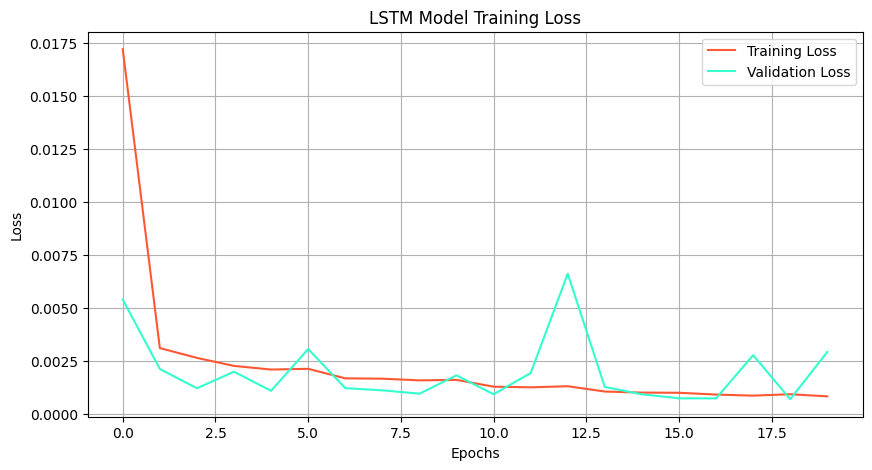

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step


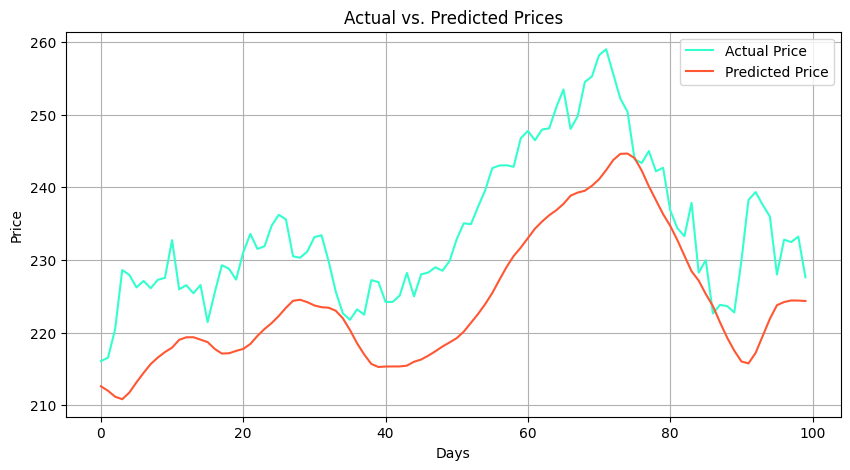

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [1]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from datetime import datetime, timedelta
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Function to fetch historical stock data
def get_historical_stock_data(ticker: str, years: int = 5, interval: str = "1d"):
    end_date = datetime.today().strftime('%Y-%m-%d')
    start_date = (datetime.today() - timedelta(days=years * 365)).strftime('%Y-%m-%d')
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date, interval=interval)
    df.reset_index(inplace=True)
    df['Date'] = df['Date'].dt.tz_localize(None)
    df = df.drop(columns=['Dividends', 'Stock Splits'])
    return df

# Visualization Functions
def plot_trend(df, column, title, color):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df[column], mode='lines', name=title, line=dict(color=color), hoverinfo='x+y'))
    fig.update_layout(title=f'{ticker} {title}', xaxis_title='Date', yaxis_title=title, template='plotly_dark', hovermode='x unified')
    fig.show()

def plot_moving_averages(df, ticker):
    df['SMA50'] = df['Close'].rolling(window=50).mean()
    df['SMA100'] = df['Close'].rolling(window=100).mean()
    df['SMA200'] = df['Close'].rolling(window=200).mean()
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Price', line=dict(color='#FF5733')))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA50'], mode='lines', name='50-Day SMA', line=dict(color='#33FFCE', dash='dash')))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA100'], mode='lines', name='100-Day SMA', line=dict(color='#FFA500', dash='dot')))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA200'], mode='lines', name='200-Day SMA', line=dict(color='#00BFFF', dash='dashdot')))
    fig.update_layout(title=f'{ticker} Moving Averages Trend', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark', hovermode='x unified')
    fig.show()

# Fetch data
ticker = "AAPL"
df = get_historical_stock_data(ticker)

# Plot graphs
plot_trend(df, 'Close', 'Closing Price Trend', '#FF5733')
plot_trend(df, 'Open', 'Opening Price Trend', '#33FFCE')
plot_trend(df, 'High', 'High Price Trend', '#FFA500')
plot_trend(df, 'Volume', 'Volume Trend', '#FF00FF')
plot_moving_averages(df, ticker)

# LSTM Model for Forecasting
scaler = MinMaxScaler()
data = scaler.fit_transform(df[['Close']])

def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 50
X, y = create_sequences(data, seq_length)
X_train, X_test = X[:-100], X[-100:]
y_train, y_test = y[:-100], y[-100:]

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16, verbose=1)

# Plot training graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='#FF5733')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#33FFCE')
plt.title('LSTM Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Predict on test data
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs. predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Price', color='#33FFCE')
plt.plot(y_pred, label='Predicted Price', color='#FF5733')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Forecast next 100 days
future_input = data[-seq_length:].reshape(1, seq_length, 1)
future_predictions = []

for _ in range(100):
    pred = model.predict(future_input)
    future_predictions.append(pred[0, 0])
    future_input = np.append(future_input[:, 1:, :], [[pred]], axis=1)

future_input = np.append(future_input[:, 1:, :], np.reshape(pred, (1, 1, 1)), axis=1)

dates = [df['Date'].iloc[-1] + timedelta(days=i) for i in range(1, 101)]

# Plot forecasted prices
plt.figure(figsize=(10, 5))
plt.plot(dates, future_predictions, label='Forecasted Prices', color='#FFA500')
plt.title('Next 100 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Display forecast in tabular format
forecast_df = pd.DataFrame({'Date': dates, 'Predicted Price': future_predictions.flatten()})
print(forecast_df.head(10))


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# Function to Fetch Stock Data
def get_historical_stock_data(ticker: str, years: int = 5, interval: str = "1d"):
    end_date = datetime.today().strftime('%Y-%m-%d')
    start_date = (datetime.today() - timedelta(days=years * 365)).strftime('%Y-%m-%d')
    
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date, interval=interval)
    df.reset_index(inplace=True)  # Reset index to keep date as a column
    
    df['Date'] = df['Date'].dt.tz_localize(None)  # Remove timezone
    df = df.drop(columns=['Dividends', 'Stock Splits'])  # Drop unnecessary columns
    
    return df

# Function to Plot Closing Price Trend
def plot_closing_price_trend(df, ticker):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Price',
                             line=dict(color='#FF5733'), hoverinfo='x+y'))
    fig.update_layout(title=f'{ticker} Closing Price Trend', xaxis_title='Date', yaxis_title='Closing Price (USD)',
                      template='plotly_dark', hovermode='x unified')
    fig.show()

# Function to Plot Opening Price Trend
def plot_opening_price_trend(df, ticker):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], mode='lines', name='Opening Price',
                             line=dict(color='#33FFCE'), hoverinfo='x+y'))
    fig.update_layout(title=f'{ticker} Opening Price Trend', xaxis_title='Date', yaxis_title='Opening Price (USD)',
                      template='plotly_dark', hovermode='x unified')
    fig.show()

# Function to Plot High Price Trend
def plot_high_price_trend(df, ticker):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], mode='lines', name='High Price',
                             line=dict(color='#FFA500'), hoverinfo='x+y'))
    fig.update_layout(title=f'{ticker} High Price Trend', xaxis_title='Date', yaxis_title='High Price (USD)',
                      template='plotly_dark', hovermode='x unified')
    fig.show()

# Function to Plot Volume Trend
def plot_volume_trend(df, ticker):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Volume'], mode='lines', name='Volume',
                             line=dict(color='#FF00FF'), hoverinfo='x+y'))
    fig.update_layout(title=f'{ticker} Volume Trend', xaxis_title='Date', yaxis_title='Volume',
                      template='plotly_dark', hovermode='x unified')
    fig.show()

# Function to Plot Moving Averages
def plot_moving_averages(df, ticker, short_window=50, long_window=200):
    df['SMA'] = df['Close'].rolling(window=short_window).mean()
    df['LMA'] = df['Close'].rolling(window=long_window).mean()
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Price',
                             line=dict(color='#FF5733'), hoverinfo='x+y'))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA'], mode='lines', name=f'{short_window}-Day SMA',
                             line=dict(color='#33FFCE', dash='dash')))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['LMA'], mode='lines', name=f'{long_window}-Day LMA',
                             line=dict(color='#FFA500', dash='dot')))
    
    fig.update_layout(title=f'{ticker} Moving Averages Trend', xaxis_title='Date', yaxis_title='Price (USD)',
                      template='plotly_dark', hovermode='x unified')
    fig.show()

# Fetch Data
ticker = "AAPL"
df = get_historical_stock_data(ticker)

# Display Initial Graphs
plot_closing_price_trend(df, ticker)
plot_opening_price_trend(df, ticker)
plot_high_price_trend(df, ticker)
plot_volume_trend(df, ticker)
plot_moving_averages(df, ticker)

# LSTM Model for Price Prediction
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Close']])

# Prepare Data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(df_scaled, seq_length)

X_train, X_test = X[:int(0.8 * len(X))], X[int(0.8 * len(X)):]
y_train, y_test = y[:int(0.8 * len(y))], y[int(0.8 * len(y)):]

# LSTM Model
model = Sequential([
    tf.keras.layers.Input(shape=(seq_length, 1)),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot Training Results
fig = go.Figure()
fig.add_trace(go.Scatter(y=y_test_actual.flatten(), mode='lines', name='Actual', line=dict(color='#33FFCE')))
fig.add_trace(go.Scatter(y=y_pred.flatten(), mode='lines', name='Predicted', line=dict(color='#FF5733')))
fig.update_layout(title='LSTM Model: Actual vs Predicted', xaxis_title='Time', yaxis_title='Price', template='plotly_dark')
fig.show()

# Forecast Next 100 Days
future_input = X_test[-1].reshape(1, seq_length, 1)
future_predictions = []

for _ in range(100):
    pred = model.predict(future_input)
    future_predictions.append(pred[0, 0])
    pred_reshaped = np.reshape(pred, (1, 1, 1))
    future_input = np.append(future_input[:, 1:, :], pred_reshaped, axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
dates = [df['Date'].iloc[-1] + timedelta(days=i) for i in range(1, 101)]

# Forecasting Graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=dates, y=future_predictions.flatten(), mode='lines', name='Forecasted Price', line=dict(color='#FF5733')))
fig.update_layout(title='100-Day Stock Price Forecast', xaxis_title='Date', yaxis_title='Price', template='plotly_dark')
fig.show()

# Display Forecast in Table
forecast_df = pd.DataFrame({'Date': dates, 'Predicted Price': future_predictions.flatten()})
print(forecast_df)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0671 - val_loss: 0.0107
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0037 - val_loss: 0.0022
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0018 - val_loss: 0.0039
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

         Date  Predicted Price
0  2025-02-08       230.798676
1  2025-02-09       230.564285
2  2025-02-10       230.152512
3  2025-02-11       229.631302
4  2025-02-12       229.046936
..        ...              ...
95 2025-05-14       200.945435
96 2025-05-15       200.822174
97 2025-05-16       200.700806
98 2025-05-17       200.581375
99 2025-05-18       200.463821

[100 rows x 2 columns]


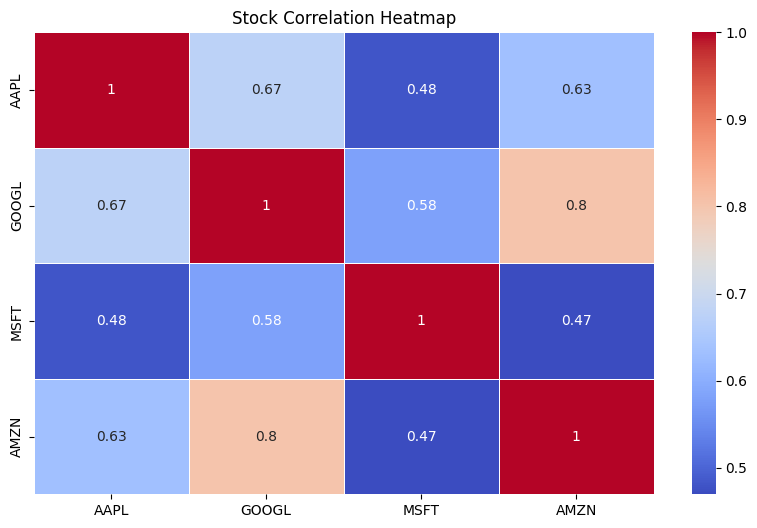

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch Stock Data
def get_stock_data(ticker, years=5):
    stock = yf.Ticker(ticker)
    df = stock.history(period=f"{years}y")
    df.reset_index(inplace=True)
    return df

# Closing Price Trend
def plot_closing_price(df, ticker):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Price', line=dict(color='#FF5733')))
    fig.update_layout(title=f'{ticker} Closing Price Trend', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')
    fig.show()

# Volume Trend
def plot_volume(df, ticker):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Volume'], mode='lines', name='Volume', line=dict(color='#FF00FF')))
    fig.update_layout(title=f'{ticker} Volume Trend', xaxis_title='Date', yaxis_title='Volume', template='plotly_dark')
    fig.show()

# Moving Averages
def plot_moving_averages(df, ticker, short_window=50, long_window=200):
    df['SMA'] = df['Close'].rolling(window=short_window).mean()
    df['LMA'] = df['Close'].rolling(window=long_window).mean()
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Price', line=dict(color='#FF5733')))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA'], mode='lines', name=f'{short_window}-Day SMA', line=dict(color='#33FFCE', dash='dash')))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['LMA'], mode='lines', name=f'{long_window}-Day LMA', line=dict(color='#FFA500', dash='dot')))
    
    fig.update_layout(title=f'{ticker} Moving Averages Trend', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')
    fig.show()

# Stock Volatility (ATR - Average True Range)
def plot_atr(df, ticker, period=14):
    df['High-Low'] = df['High'] - df['Low']
    df['High-Close'] = abs(df['High'] - df['Close'].shift(1))
    df['Low-Close'] = abs(df['Low'] - df['Close'].shift(1))
    df['True Range'] = df[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
    df['ATR'] = df['True Range'].rolling(window=period).mean()
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['ATR'], mode='lines', name='ATR', line=dict(color='#17BECF')))
    fig.update_layout(title=f'{ticker} Average True Range (Volatility)', xaxis_title='Date', yaxis_title='ATR', template='plotly_dark')
    fig.show()

# Stock Comparison Heatmap
def plot_stock_correlation(tickers, years=1):
    data = {}
    for ticker in tickers:
        df = get_stock_data(ticker, years)
        data[ticker] = df['Close']
    df_corr = pd.DataFrame(data).corr()
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Stock Correlation Heatmap')
    plt.show()

# Example Usage
ticker = 'AAPL'
df = get_stock_data(ticker)
plot_closing_price(df, ticker)
plot_volume(df, ticker)
plot_moving_averages(df, ticker)
plot_atr(df, ticker)
plot_stock_correlation(['AAPL', 'GOOGL', 'MSFT', 'AMZN'])


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go

def get_stock_data(ticker: str, period='6mo', interval='1d'):
    stock = yf.Ticker(ticker)
    df = stock.history(period=period, interval=interval)
    df.reset_index(inplace=True)
    return df

def plot_candlestick(df, ticker):
    fig = go.Figure()
    fig.add_trace(go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name='Candlestick'
    ))
    fig.update_layout(title=f'{ticker} Candlestick Chart', xaxis_title='Date', yaxis_title='Price', template='plotly_dark')
    fig.show()

def plot_bollinger_bands(df, ticker, window=20):
    df['SMA'] = df['Close'].rolling(window=window).mean()
    df['Upper Band'] = df['SMA'] + (df['Close'].rolling(window=window).std() * 2)
    df['Lower Band'] = df['SMA'] - (df['Close'].rolling(window=window).std() * 2)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Price'))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA'], mode='lines', name='SMA (20-day)', line=dict(color='orange')))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Upper Band'], mode='lines', name='Upper Band', line=dict(color='red', dash='dot')))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Lower Band'], mode='lines', name='Lower Band', line=dict(color='green', dash='dot')))
    
    fig.update_layout(title=f'{ticker} Bollinger Bands', xaxis_title='Date', yaxis_title='Price', template='plotly_dark')
    fig.show()

def plot_rsi(df, ticker, period=14):
    delta = df['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['RSI'], mode='lines', name='RSI'))
    fig.add_hline(y=70, line_dash='dot', annotation_text='Overbought', annotation_position='top right')
    fig.add_hline(y=30, line_dash='dot', annotation_text='Oversold', annotation_position='bottom right')
    
    fig.update_layout(title=f'{ticker} RSI Indicator', xaxis_title='Date', yaxis_title='RSI Value', template='plotly_dark')
    fig.show()

# Example Usage
ticker = 'AAPL'  # Change this to any stock symbol
df = get_stock_data(ticker)
plot_candlestick(df, ticker)
plot_bollinger_bands(df, ticker)
plot_rsi(df, ticker)


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Fetch stock data
def get_stock_data(ticker, years=5):
    stock = yf.Ticker(ticker)
    df = stock.history(period=f"{years}y")
    df.reset_index(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    return df, stock

# Plot Candlestick Chart
def plot_candlestick_chart(df, ticker):
    fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                         open=df['Open'], high=df['High'],
                                         low=df['Low'], close=df['Close'],
                                         name="OHLC")])
    fig.update_layout(title=f'{ticker} Candlestick Chart',
                      xaxis_title='Date', yaxis_title='Price (USD)',
                      template='plotly_dark')
    fig.show()

# Plot Bollinger Bands
def plot_bollinger_bands(df, ticker):
    df['20_SMA'] = df['Close'].rolling(window=20).mean()
    df['Upper'] = df['20_SMA'] + 2 * df['Close'].rolling(window=20).std()
    df['Lower'] = df['20_SMA'] - 2 * df['Close'].rolling(window=20).std()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Upper'], mode='lines', name='Upper Band', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['20_SMA'], mode='lines', name='20-Day SMA', line=dict(color='yellow')))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Lower'], mode='lines', name='Lower Band', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Price', line=dict(color='white')))
    
    fig.update_layout(title=f'{ticker} Bollinger Bands', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')
    fig.show()

# Plot RSI Indicator
def plot_rsi(df, ticker):
    df['Change'] = df['Close'].diff()
    df['Gain'] = np.where(df['Change'] > 0, df['Change'], 0)
    df['Loss'] = np.where(df['Change'] < 0, abs(df['Change']), 0)

    avg_gain = df['Gain'].rolling(window=14).mean()
    avg_loss = df['Loss'].rolling(window=14).mean()
    df['RS'] = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + df['RS']))

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['RSI'], mode='lines', name='RSI', line=dict(color='purple')))
    fig.add_hline(y=70, line_dash="dash", line_color="red", annotation_text="Overbought (70)")
    fig.add_hline(y=30, line_dash="dash", line_color="green", annotation_text="Oversold (30)")

    fig.update_layout(title=f'{ticker} RSI Indicator', xaxis_title='Date', yaxis_title='RSI', template='plotly_dark')
    fig.show()

# Plot Revenue Growth Chart
def plot_revenue_growth(stock, ticker):
    try:
        df_financials = stock.financials.T  # Transpose to get recent data first
        df_financials = df_financials[['Total Revenue']].dropna().reset_index()
        df_financials.columns = ['Date', 'Revenue']

        fig = go.Figure()
        fig.add_trace(go.Bar(x=df_financials['Date'], y=df_financials['Revenue'], name="Revenue", marker_color='cyan'))
        fig.update_layout(title=f'{ticker} Revenue Growth', xaxis_title='Date', yaxis_title='Revenue (USD)', template='plotly_dark')
        fig.show()
    except KeyError:
        print(f"Revenue data not available for {ticker}")

# Plot Net Profit Growth Chart
def plot_net_profit_growth(stock, ticker):
    try:
        df_financials = stock.financials.T  
        df_financials = df_financials[['Net Income']].dropna().reset_index()
        df_financials.columns = ['Date', 'Net Income']

        fig = go.Figure()
        fig.add_trace(go.Bar(x=df_financials['Date'], y=df_financials['Net Income'], name="Net Income", marker_color='gold'))
        fig.update_layout(title=f'{ticker} Net Profit Growth', xaxis_title='Date', yaxis_title='Net Income (USD)', template='plotly_dark')
        fig.show()
    except KeyError:
        print(f"Net Profit data not available for {ticker}")

# Run visualizations
ticker = "AAPL"  # Change the stock ticker as needed
df, stock = get_stock_data(ticker)

plot_candlestick_chart(df, ticker)
plot_bollinger_bands(df, ticker)
plot_rsi(df, ticker)
plot_revenue_growth(stock, ticker)
plot_net_profit_growth(stock, ticker)


In [6]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp

# Fetch financial data
def get_financial_data(ticker):
    stock = yf.Ticker(ticker)
    df_financials = stock.financials.T  # Transpose to get recent data first
    return df_financials

# Generate KPI summary box
def generate_kpi_box(metric_name, value, color):
    return go.Indicator(
        mode="number",
        value=value,
        title={"text": metric_name},
        number={"font": {"size": 30, "color": color}},
        domain={"row": 0, "column": 0}
    )

# Generate financial growth chart
def generate_growth_chart(df, metric_name, color):
    fig = go.Figure()
    fig.add_trace(go.Bar(x=df['Date'], y=df[metric_name], marker_color=color, name=metric_name))
    fig.update_layout(title=f'{metric_name} Growth', xaxis_title='Date', yaxis_title=f'{metric_name} (USD)', template='plotly_dark')
    return fig

# Main visualization function
def plot_financials(ticker):
    df_financials = get_financial_data(ticker)
    
    if 'Total Revenue' in df_financials.columns and 'Net Income' in df_financials.columns:
        # Prepare data
        df_financials = df_financials[['Total Revenue', 'Net Income']].dropna().reset_index()
        df_financials.columns = ['Date', 'Revenue', 'Net Income']
        
        # Latest values
        latest_revenue = df_financials['Revenue'].iloc[-1]
        latest_profit = df_financials['Net Income'].iloc[-1]

        # Create dashboard layout
        fig = sp.make_subplots(rows=2, cols=2, specs=[[{"type": "indicator"}, {"type": "indicator"}],
                                                       [{"type": "xy"}, {"type": "xy"}]],
                               subplot_titles=("Revenue Growth", "Net Profit Growth"))

        # Add KPI summary boxes
        fig.add_trace(generate_kpi_box("Revenue (Latest)", latest_revenue, "cyan"), row=1, col=1)
        fig.add_trace(generate_kpi_box("Net Profit (Latest)", latest_profit, "gold"), row=1, col=2)

        # Add revenue growth chart
        revenue_chart = generate_growth_chart(df_financials, 'Revenue', 'cyan')
        for trace in revenue_chart.data:
            fig.add_trace(trace, row=2, col=1)

        # Add net profit growth chart
        profit_chart = generate_growth_chart(df_financials, 'Net Income', 'gold')
        for trace in profit_chart.data:
            fig.add_trace(trace, row=2, col=2)

        fig.update_layout(title=f"{ticker} Financial Performance", template="plotly_dark", showlegend=False)
        fig.show()
    else:
        print(f"Financial data not available for {ticker}")

# Run visualization
plot_financials("AAPL")  # Change ticker as needed


In [9]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp

# Fetch financial data
def get_financial_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.financials.T.reset_index()
    df.rename(columns={'index': 'Date', 'Total Revenue': 'Revenue', 'Net Income': 'Net_Profit'}, inplace=True)

    # Convert to datetime and extract only year
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year  # Extract year

    # Group by year (sum up yearly values)
    df = df.groupby('Year', as_index=False).sum()

    return df

# Generate financial growth chart
def generate_growth_chart(df, metric_name, color):
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df['Year'],  # Grouped by Year
        y=df[metric_name], 
        marker_color=color, 
        name=metric_name,
        width=0.5  # Slightly narrower bars for clarity
    ))

    # Set y-axis ticks to 50B intervals
    fig.update_layout(
        title=f'{metric_name} Growth Over Years',
        xaxis_title='Year',
        yaxis_title=f'{metric_name} (USD)',
        template='plotly_dark',
        yaxis=dict(tickmode='linear', dtick=50e9)  # 50 Billion interval
    )
    return fig

# Plot financials
def plot_financials(ticker):
    df_financials = get_financial_data(ticker)
    
    if not df_financials.empty:
        # Latest values
        latest_revenue = df_financials['Revenue'].iloc[-1]
        latest_profit = df_financials['Net_Profit'].iloc[-1]

        # Create subplots
        fig = sp.make_subplots(
            rows=2, cols=2, 
            specs=[[{"type": "indicator"}, {"type": "indicator"}], 
                   [{"type": "xy"}, {"type": "xy"}]],
            subplot_titles=("Revenue Growth", "Net Profit Growth"),
            column_widths=[0.4, 0.4]  # Reduce width of KPI boxes
        )

        # Add KPI summary boxes
        fig.add_trace(go.Indicator(
            mode="number",
            value=latest_revenue,
            title={"text": "Revenue (Latest)"},
            number={"font": {"size": 20, "color": "cyan"}},
            domain={"row": 0, "column": 0}
        ), row=1, col=1)

        fig.add_trace(go.Indicator(
            mode="number",
            value=latest_profit,
            title={"text": "Net Profit (Latest)"},
            number={"font": {"size": 20, "color": "gold"}},
            domain={"row": 0, "column": 1}
        ), row=1, col=2)

        # Add revenue and net profit growth charts
        for trace in generate_growth_chart(df_financials, 'Revenue', 'cyan').data:
            fig.add_trace(trace, row=2, col=1)
        for trace in generate_growth_chart(df_financials, 'Net_Profit', 'gold').data:
            fig.add_trace(trace, row=2, col=2)

        fig.update_layout(title=f"{ticker} Financial Performance", template="plotly_dark", showlegend=False)
        fig.show()
    else:
        print(f"⚠️ No financial data available for {ticker}")

# Run visualization
plot_financials("AAPL")  # Test with Apple


TypeError: datetime64 type does not support sum operations

In [10]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp

# Fetch financial data
def get_financial_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.financials.T.reset_index()
    
    # Rename columns
    df.rename(columns={'index': 'Date', 'Total Revenue': 'Revenue', 'Net Income': 'Net_Profit'}, inplace=True)

    # Convert to datetime and extract only year
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year  # Extract year

    # Drop non-numeric columns before summing
    df = df.drop(columns=['Date'])  # Remove Date to prevent errors in summation
    df = df.groupby('Year', as_index=False).sum()

    return df

# Generate financial growth chart
def generate_growth_chart(df, metric_name, color):
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df['Year'],  
        y=df[metric_name], 
        marker_color=color, 
        name=metric_name,
        width=0.5  # Adjust bar width for better spacing
    ))

    # Set y-axis ticks to 50B intervals
    fig.update_layout(
        title=f'{metric_name} Growth Over Years',
        xaxis_title='Year',
        yaxis_title=f'{metric_name} (USD)',
        template='plotly_dark',
        yaxis=dict(tickmode='linear', dtick=50e9)  # 50 Billion interval
    )
    return fig

# Plot financials
def plot_financials(ticker):
    df_financials = get_financial_data(ticker)
    
    if not df_financials.empty:
        # Latest values
        latest_revenue = df_financials['Revenue'].iloc[-1]
        latest_profit = df_financials['Net_Profit'].iloc[-1]

        # Create subplots
        fig = sp.make_subplots(
            rows=2, cols=2, 
            specs=[[{"type": "indicator"}, {"type": "indicator"}], 
                   [{"type": "xy"}, {"type": "xy"}]],
            subplot_titles=("Revenue Growth", "Net Profit Growth"),
            column_widths=[0.4, 0.4]  # Reduce width of KPI boxes
        )

        # Add KPI summary boxes
        fig.add_trace(go.Indicator(
            mode="number",
            value=latest_revenue,
            title={"text": "Revenue (Latest)"},
            number={"font": {"size": 20, "color": "cyan"}},
            domain={"row": 0, "column": 0}
        ), row=1, col=1)

        fig.add_trace(go.Indicator(
            mode="number",
            value=latest_profit,
            title={"text": "Net Profit (Latest)"},
            number={"font": {"size": 20, "color": "gold"}},
            domain={"row": 0, "column": 1}
        ), row=1, col=2)

        # Add revenue and net profit growth charts
        for trace in generate_growth_chart(df_financials, 'Revenue', 'cyan').data:
            fig.add_trace(trace, row=2, col=1)
        for trace in generate_growth_chart(df_financials, 'Net_Profit', 'gold').data:
            fig.add_trace(trace, row=2, col=2)

        fig.update_layout(title=f"{ticker} Financial Performance", template="plotly_dark", showlegend=False)
        fig.show()
    else:
        print(f"⚠️ No financial data available for {ticker}")

# Run visualization
plot_financials("AAPL")  # Test with Apple


In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

def get_financial_data(ticker):
    """Fetch financials (Revenue & Net Income) and clean the data."""
    stock = yf.Ticker(ticker)
    df = stock.financials.T.reset_index()

    # Convert Date to Year
    df['Date'] = pd.to_datetime(df['index'], errors='coerce')  # Handle errors
    df = df.dropna(subset=['Date'])  # Remove invalid dates
    df['Year'] = df['Date'].dt.year  

    # Select relevant financial metrics
    df = df[['Year', 'Total Revenue', 'Net Income']].rename(columns={'Total Revenue': 'Revenue', 'Net Income': 'Net Profit'})

    # Drop years where data is missing
    df = df.dropna().astype({'Revenue': 'float', 'Net Profit': 'float'})
    df = df[df['Revenue'] > 0]  # Remove years with missing revenue

    return df

def plot_financials(ticker):
    """Plot Revenue Growth & Net Profit Growth with missing years handled."""
    df_financials = get_financial_data(ticker)

    if not df_financials.empty:
        # Create bar charts
        fig_revenue = px.bar(df_financials, x='Year', y='Revenue', 
                             title=f'{ticker} Revenue Growth', 
                             text=df_financials['Revenue'].apply(lambda x: f"${x/1e9:.1f}B"),
                             labels={'Revenue': 'Revenue (USD)', 'Year': 'Year'},
                             color_discrete_sequence=['#3498db'])

        fig_profit = px.bar(df_financials, x='Year', y='Net Profit', 
                            title=f'{ticker} Net Profit Growth', 
                            text=df_financials['Net Profit'].apply(lambda x: f"${x/1e9:.1f}B"),
                            labels={'Net Profit': 'Net Profit (USD)', 'Year': 'Year'},
                            color_discrete_sequence=['#e74c3c'])

        # Improve layout
        for fig in [fig_revenue, fig_profit]:
            fig.update_traces(textposition='outside', marker_line_width=1.5)
            fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))  # Ensure all years show up

        # Show plots
        fig_revenue.show()
        fig_profit.show()

    else:
        print(f"⚠️ No financial data available for {ticker}")

# Run visualization
plot_financials("AAPL")  # Test with Apple


In [12]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

def get_financial_data(ticker):
    """Fetch financials (Revenue & Net Income) and clean the data."""
    stock = yf.Ticker(ticker)
    df = stock.financials.T.reset_index()

    # Convert Date to Year
    df['Date'] = pd.to_datetime(df['index'], errors='coerce')
    df = df.dropna(subset=['Date'])
    df['Year'] = df['Date'].dt.year  

    # Select relevant financial metrics
    df = df[['Year', 'Total Revenue', 'Net Income']].rename(columns={'Total Revenue': 'Revenue', 'Net Income': 'Net Profit'})

    # Drop years where data is missing
    df = df.dropna().astype({'Revenue': 'float', 'Net Profit': 'float'})
    df = df[df['Revenue'] > 0]

    return df

def plot_financials(ticker):
    """Plot Revenue Growth & Net Profit Growth side by side."""
    df_financials = get_financial_data(ticker)

    if not df_financials.empty:
        # Create Revenue Growth Bar Chart
        fig_revenue = go.Figure()
        fig_revenue.add_trace(go.Bar(
            x=df_financials['Year'], 
            y=df_financials['Revenue'],
            text=df_financials['Revenue'].apply(lambda x: f"${x/1e9:.1f}B"),
            textposition='outside',
            marker=dict(color='#3498db')
        ))
        fig_revenue.update_layout(
            title=f"{ticker} Revenue Growth", 
            xaxis_title="Year",
            yaxis_title="Revenue (USD)",
            xaxis=dict(tickmode='linear', dtick=1),
            width=600, height=400
        )

        # Create Net Profit Growth Bar Chart
        fig_profit = go.Figure()
        fig_profit.add_trace(go.Bar(
            x=df_financials['Year'], 
            y=df_financials['Net Profit'],
            text=df_financials['Net Profit'].apply(lambda x: f"${x/1e9:.1f}B"),
            textposition='outside',
            marker=dict(color='#e74c3c')
        ))
        fig_profit.update_layout(
            title=f"{ticker} Net Profit Growth", 
            xaxis_title="Year",
            yaxis_title="Net Profit (USD)",
            xaxis=dict(tickmode='linear', dtick=1),
            width=600, height=400
        )

        # Combine both charts in a single row
        from plotly.subplots import make_subplots
        fig_combined = make_subplots(rows=1, cols=2, subplot_titles=[f"{ticker} Revenue Growth", f"{ticker} Net Profit Growth"])
        
        # Add Revenue Chart to Subplot
        for trace in fig_revenue.data:
            fig_combined.add_trace(trace, row=1, col=1)

        # Add Net Profit Chart to Subplot
        for trace in fig_profit.data:
            fig_combined.add_trace(trace, row=1, col=2)

        fig_combined.update_layout(
            width=1200, height=450,
            showlegend=False
        )

        # Show Final Side-by-Side Chart
        fig_combined.show()

    else:
        print(f"⚠️ No financial data available for {ticker}")

# Run visualization
plot_financials("AAPL")  # Test with Apple
